# HW 3
## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import cluster
from datetime import datetime
import collections
from mpl_toolkits.mplot3d import Axes3D

## Q1 Regression analysis

### Data loading

In [2]:
hbiking_df = pd.read_csv("hour.csv")
col_names = hbiking_df.columns
first_day = datetime.strptime("2011-01-01", "%Y-%m-%d")
#convert date to a number
hbiking_df["dteday"] = [(datetime.strptime(d, "%Y-%m-%d") - first_day).days for d in hbiking_df["dteday"]]
hfeature_names = [c for c in col_names if c not in ("instant", "casual", "registered", "cnt")]
hbiking_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,0,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,0,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,0,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,0,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
dbiking_df = pd.read_csv("day.csv")
col_names = dbiking_df.columns
first_day = datetime.strptime("2011-01-01", "%Y-%m-%d")
dbiking_df["dteday"] = [(datetime.strptime(d, "%Y-%m-%d") - first_day).days for d in dbiking_df["dteday"]]
dfeature_names = [c for c in col_names if c not in ("instant", "casual", "registered", "cnt")]

### Evaluation

This evaluation function represents the minimum (except where optional is mentioned).  The function outputs the required metrics ($R^2$ and either RMSE or MSE) and a plot.  The plot which we haven't done before and is here as a simple diagnostic show whether predicted vs ground truth values.  In a (theoretically) perfect regression predicted should equal ground truth and the points should align on the red dotted diagonal line.

In [4]:
def do_one(data, features, target, model, minclamp=None):
    X = data[features].values
    y = data[target].values
    
    kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

    r2, rmse = [],[]
    for train_index, test_index in kf.split(X):    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        

        ## optional
        ss = preprocessing.StandardScaler()
        X_train = ss.fit_transform(X_train)
        X_test = ss.transform(X_test)
        ##

        model.fit(X_train, y_train)
        
        y_hat = model.predict(X_test)
        ## optional
        # for the end of this document
        if minclamp is not None:
            y_hat = np.maximum(minclamp, y_hat)
        ##

        r2 += [metrics.r2_score(y_test, y_hat)]
        # MSE also acceptable
        rmse += [metrics.mean_squared_error(y_test, y_hat, squared=False)]

    print("{}:{}: {}, {}".format(model.__class__.__name__, target, np.mean(r2), np.mean(rmse)))
    
    ## Very Optional
    plt.scatter(y_test, y_hat)
    xymin = min(np.min(y_test), np.min(y_hat))
    xymax = max(np.max(y_test), np.max(y_hat))
    plt.plot([xymin, xymax],[xymin, xymax], color="r", linestyle="--")
    plt.show()
    ##

### Find an optimal k

This need not be a thorough check but some kind of sanity check should be made that we're using a good k value for kNN.  In this case it just so happens that the best k is k=5 which is also the default value.  So we'll go with that.

3
KNeighborsRegressor:cnt: 0.6409833642358403, 108.62721139384739


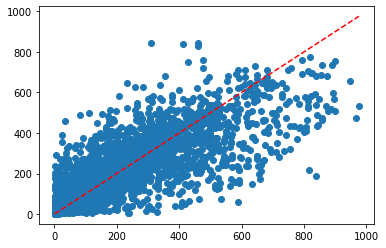

5
KNeighborsRegressor:cnt: 0.646047281862716, 107.86962363987205


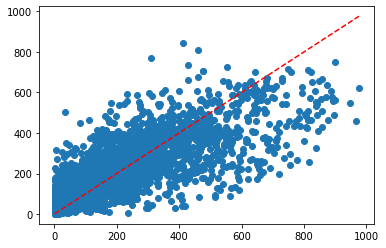

7
KNeighborsRegressor:cnt: 0.6409109708033491, 108.64502197391842


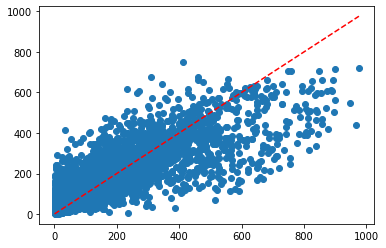

9
KNeighborsRegressor:cnt: 0.6334295876980172, 109.77572016478055


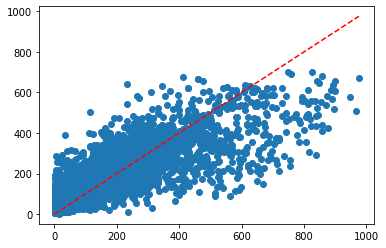

11
KNeighborsRegressor:cnt: 0.6284697766694503, 110.51501439005465


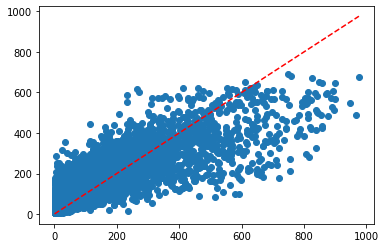

In [5]:
for k in (3, 5, 7, 9, 11):
    print(k)
    do_one(hbiking_df, hfeature_names, "cnt", neighbors.KNeighborsRegressor(n_neighbors=k))

### Hourly biking scenarios

1. Linear Regression
  1. Count -- total riders
  1. Casual riders
  1. Registered riders
2. kNN Regression
  1. Count -- total riders
  1. Casual riders
  1. Registered riders
  
Some things that should be noted in the report
  1. because these are relatively small valued (close to zero) predictions and this is a linear model, the linear model produces negative values. In the real world we'd clamp these predictions to zero and predict that instead
  1. kNN does much better on the above scenarios because we're essentially averaging the most similar k neighbors there's no opportunity for negative values

LinearRegression:cnt: 0.3875547105706339, 141.88925088454033


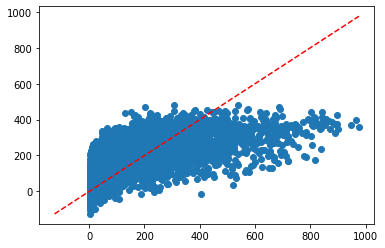

LinearRegression:casual: 0.45441488398121005, 36.40055786218845


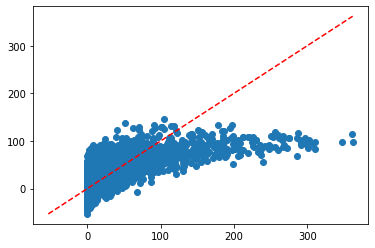

LinearRegression:registered: 0.3340464427137418, 123.45335919505067


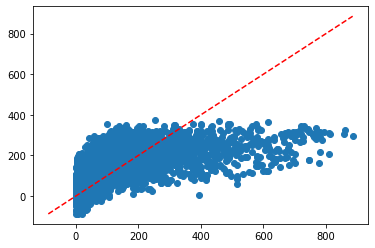

KNeighborsRegressor:cnt: 0.646047281862716, 107.86962363987205


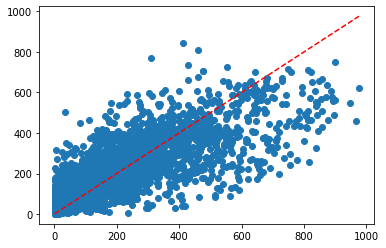

KNeighborsRegressor:casual: 0.8344477486837503, 20.031357601116966


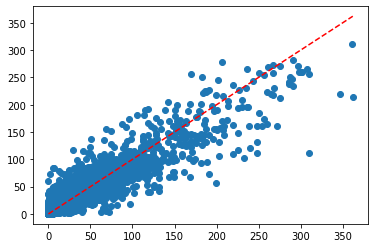

KNeighborsRegressor:registered: 0.5657379676645664, 99.69944236182009


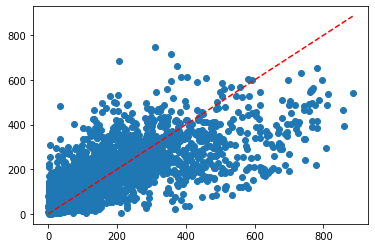

In [6]:
do_one(hbiking_df, hfeature_names, "cnt", linear_model.LinearRegression())
do_one(hbiking_df, hfeature_names, "casual", linear_model.LinearRegression())
do_one(hbiking_df, hfeature_names, "registered", linear_model.LinearRegression())

do_one(hbiking_df, hfeature_names, "cnt", neighbors.KNeighborsRegressor())
do_one(hbiking_df, hfeature_names, "casual", neighbors.KNeighborsRegressor())
do_one(hbiking_df, hfeature_names,  "registered", neighbors.KNeighborsRegressor())

### Daily biking scenarios

1. Linear Regression
  1. Count -- total riders
  1. Casual riders
  1. Registered riders
2. kNN Regression
  1. Count -- total riders
  1. Casual riders
  1. Registered riders
  
Some things that should be noted in the report
  1. The negative effect is gone because the values don't get cut off by the zero point

LinearRegression:cnt: 0.7851876416033219, 883.1764918939007


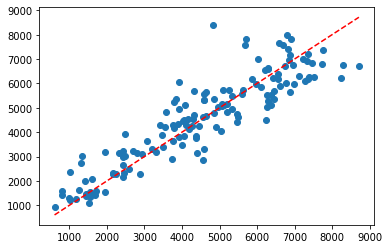

LinearRegression:casual: 0.6620991952335917, 394.19354761409596


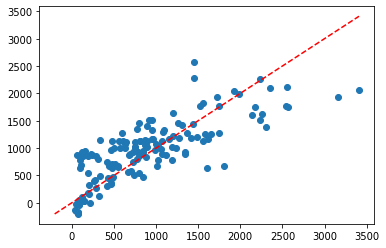

LinearRegression:registered: 0.8033438044000436, 683.0373944568776


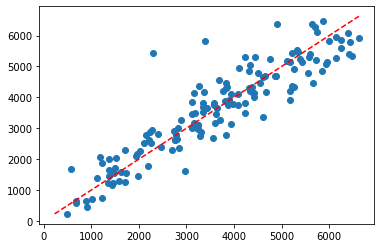

KNeighborsRegressor:cnt: 0.8246058654283953, 798.6110383948007


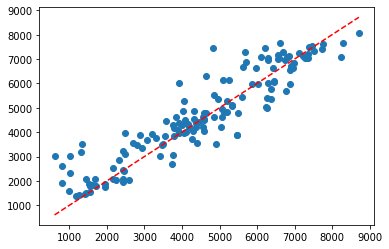

KNeighborsRegressor:casual: 0.7637312975912892, 329.6471187648811


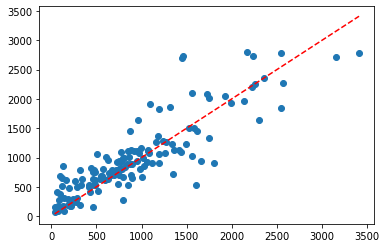

KNeighborsRegressor:registered: 0.8350040436006421, 624.9797941523967


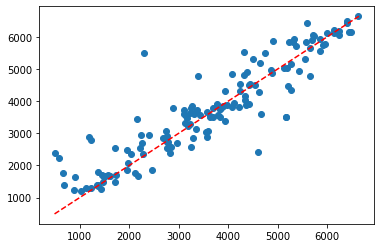

In [7]:
do_one(dbiking_df, dfeature_names, "cnt", linear_model.LinearRegression())
do_one(dbiking_df, dfeature_names, "casual", linear_model.LinearRegression())
do_one(dbiking_df, dfeature_names, "registered", linear_model.LinearRegression())

do_one(dbiking_df, dfeature_names, "cnt", neighbors.KNeighborsRegressor())
do_one(dbiking_df, dfeature_names, "casual", neighbors.KNeighborsRegressor())
do_one(dbiking_df, dfeature_names,  "registered", neighbors.KNeighborsRegressor())

## Q2: PCA and k-means

### Load data

In [8]:
colnames = ["area","perimeter", "compactness", "length", "width", "assymetry", "groove", "class"]
seeds_df = pd.read_csv("seeds_dataset.txt", sep="\t", header=None, names=colnames)
features = colnames[:-1]
X = seeds_df[features].values
y = seeds_df["class"]

In [9]:
kmeans = cluster.KMeans(n_clusters=3, random_state=42)

In [10]:
y_pred = kmeans.fit_predict(X)

In [11]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [12]:
y_aligned = np.choose(y_pred, [1, 2, 3]).astype(np.float)
y_aligned

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 1., 1., 1., 1.,
       1., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 1., 2., 1., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1.,
       2., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3.,
       3., 3., 3., 3., 3., 3.])

In [13]:
print("Clusters (result of k-means)")
print(collections.Counter(y_aligned)) #Print the frequency of elements in a numpy array
print("Ground truth")
print(collections.Counter(y)) # ditto

Clusters (result of k-means)
Counter({3.0: 77, 1.0: 72, 2.0: 61})
Ground truth
Counter({1: 70, 2: 70, 3: 70})


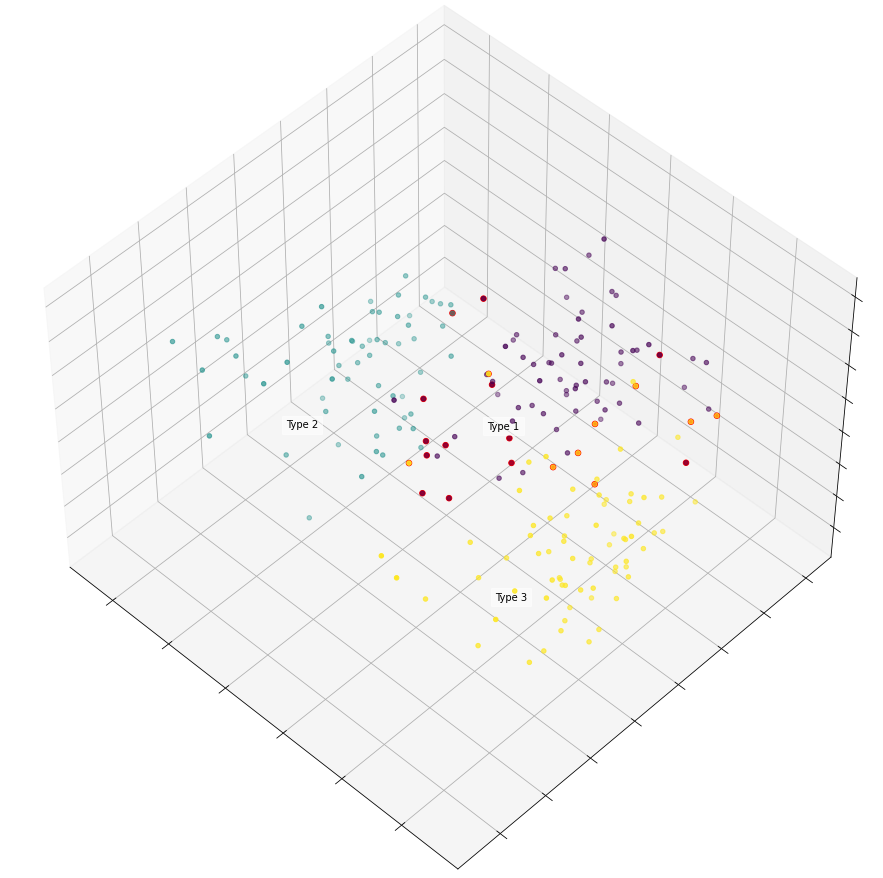

In [14]:
#PCA demonstrated and plotting example 

fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

### PCA part of the code
#============================================================
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
Xt = pca.transform(X)
#============================================================

for name, label in [('Type 1', 1), ('Type 2', 2), ('Type 3', 3)]: #Assign actual names to the numeric labels
    ax.text3D(Xt[y == label, 0].mean(),
              Xt[y == label, 1].mean() + 1.5,
              Xt[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

ax.scatter(Xt[:, 0], Xt[:, 1], Xt[:, 2], c=y_aligned) # plotting the three clusters and the indicating the sequence parameter 'c'

## Optional
mask = y_aligned != y
ax.scatter(Xt[mask, 0], Xt[mask, 1], Xt[mask, 2], c='r', marker='o', s=30, alpha=1) # plot mis-labeled values in red
##

#ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## Advanced Stuff not expected for homework but if you did this kudos!  

Basically the reason we see such poor results in the hourly compared to the daily datasets is 
that the ridership is not linearly dependent on the hour and so it doesn't fit well, you can
see that happening in the graphs above where the output is not linear

In [15]:
from pandas import plotting
from sklearn import preprocessing

In [16]:
# plotting.scatter_matrix(hbiking_df, figsize=(8,6));

array([[<AxesSubplot:xlabel='hr', ylabel='hr'>,
        <AxesSubplot:xlabel='cnt', ylabel='hr'>],
       [<AxesSubplot:xlabel='hr', ylabel='cnt'>,
        <AxesSubplot:xlabel='cnt', ylabel='cnt'>]], dtype=object)

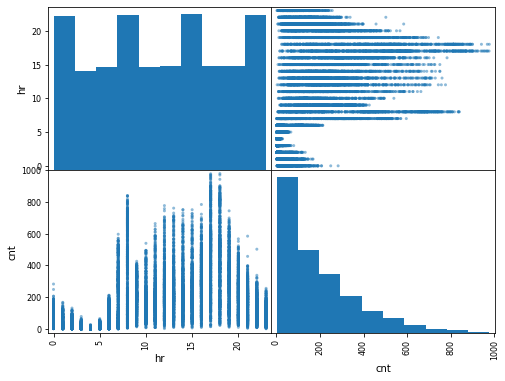

In [17]:
plotting.scatter_matrix(hbiking_df[["hr", "cnt"]], figsize=(8,6))

In [18]:
# so very definitely not linear, we can fix this by turning the hour time into a categorical variable
# get_dummies works like one hot encoding but is much easier to follow 
hbiking2_df = hbiking_df.copy()
for col in ("hr",):
    hourly_df = pd.get_dummies(hbiking_df[col], prefix=col)
    hbiking2_df = pd.concat([hbiking2_df, hourly_df], axis=1).drop(col, axis=1)
    hbiking2_df.tail()

LinearRegression:cnt: 0.6901121161724653, 100.91783556712389


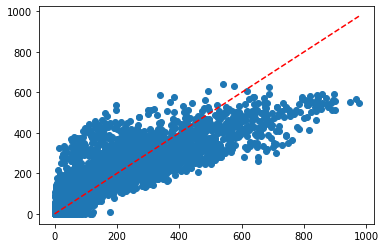

LinearRegression:casual: 0.5999938919643233, 31.170501422626835


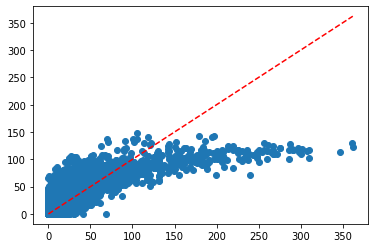

LinearRegression:registered: 0.6889700580023905, 84.3547857177389


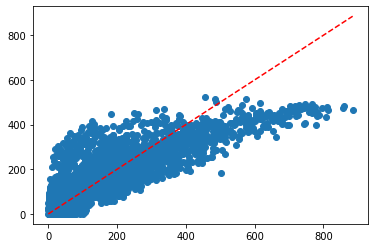

In [19]:
hfeature2_names = [c for c in hbiking2_df.columns if c not in ("hr", "instant", "casual", "registered", "cnt")]

do_one(hbiking2_df, hfeature2_names, "cnt", linear_model.LinearRegression(), minclamp=0)
do_one(hbiking2_df, hfeature2_names, "casual", linear_model.LinearRegression(), minclamp=0)
do_one(hbiking2_df, hfeature2_names, "registered", linear_model.LinearRegression(), minclamp=0)

There's a definite improvement in the linear model.  The point is here we're trying to make a somewhat nonlinear dataset work with a linear model.  You could similarly split up other nonlinear variables into categories that make sense but this is enough for to make the point.